<a href="https://colab.research.google.com/github/nevesmarcos42/an-lise_de_atores/blob/main/An%C3%A1lise_de_fatores_no_conjunto_de_dados_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de fatores no dataset Iris

In [32]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn import datasets
from sklearn.cluster import DBSCAN
from collections import Counter

from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report

In [33]:
iris = datasets.load_iris()
X = iris.data
nomes_das_variaveis = iris.feature_names

X[0:5, ]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [34]:
fatores = FactorAnalysis().fit(X)

pd.DataFrame(fatores.components_, columns=nomes_das_variaveis)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.71,-0.16,1.65,0.70
1,0.12,0.16,-0.04,-0.01
2,-0.00,0.00,0.00,0.00
3,-0.00,0.00,0.00,-0.00


# Analise de comportamento PCA

In [35]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

In [36]:
# Razão da Variância
pca= PCA()
iris_pca = pca.fit_transform(X)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

In [37]:
# Variância Cumulativa
pca.explained_variance_ratio_.sum()

0.9999999999999999

In [38]:
# Componentes Principais
comps = pd.DataFrame(pca.components_, columns=nomes_das_variaveis)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.36,-0.08,0.86,0.36
1,0.66,0.73,-0.17,-0.08
2,-0.58,0.60,0.08,0.55
3,0.32,-0.32,-0.48,0.75


<Axes: >

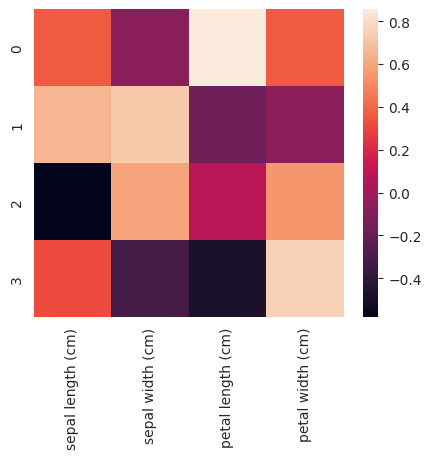

In [ ]:
# Heatmap
sns.heatmap(comps)

# Analise de Outliers

<Axes: >

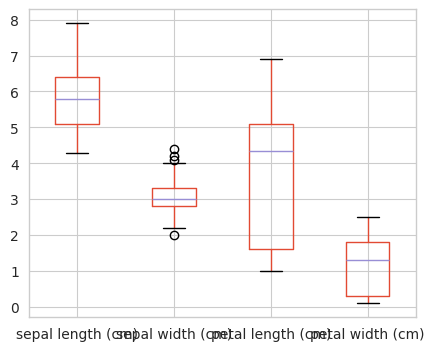

In [39]:
# Analis de valores extremos usando método univariados
# Usando boxplots para indetificar outliers
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.boxplot()

In [40]:
largura_cepa = df['sepal width (cm)']
# Cria filtro para linhas com valores maiores que 4
iris_outliers = largura_cepa > 4
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.70,4.40,1.50,0.40
32,5.20,4.10,1.50,0.10
33,5.50,4.20,1.40,0.20


In [43]:
# Cria filtro para linhas com valores menores que 2.05
iris_outliers = largura_cepa < 2.05
df[iris_outliers]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.00,2.00,3.50,1.00


In [42]:
# Aplicando a identificação de outlier de Tukey
pd.options.display.float_format = '{:.2f}'.format
X_df = pd.DataFrame(df['sepal width (cm)'])
sumario = X_df.describe()
sumario

,sepal width (cm)
count,150.00
mean,3.06
std,0.44
min,2.00
25%,2.80
50%,3.00
75%,3.30
max,4.40


In [44]:
# Calculando os limites inferior e superior do intervalo entre quartis
iqr = sumario.loc['75%'] - sumario.loc['25%']
print(iqr)

sepal width (cm)   0.50
dtype: float64


In [45]:
limite_inferior = sumario.loc['25%'] - 1.5 * iqr
print(limite_inferior)

sepal width (cm)   2.05
dtype: float64


In [46]:
limite_superior = sumario.loc['75%'] + 1.5 * iqr
print(limite_superior)

sepal width (cm)   4.05
dtype: float64


In [47]:
# Analise de metodos multivariados para detecção de outliers
df = sns.load_dataset('iris')
df.columns=['comp da cepa', 'larg da cepa', 'comp da pétala', 'larg da pétala', 'especie']
df.head()

,comp da cepa,larg da cepa,comp da pétala,larg da pétala,especie
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


<ipython-input-48-ac9924adcfae>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='especie', y='comp da cepa', data=df, palette='hls')


<Axes: xlabel='especie', ylabel='comp da cepa'>

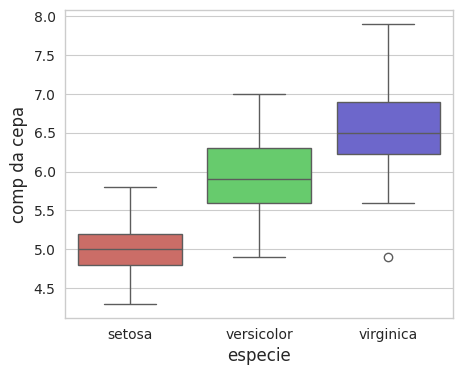

In [48]:
# Inspeciona boxplots visualmente
sns.boxplot(x='especie', y='comp da cepa', data=df, palette='hls')

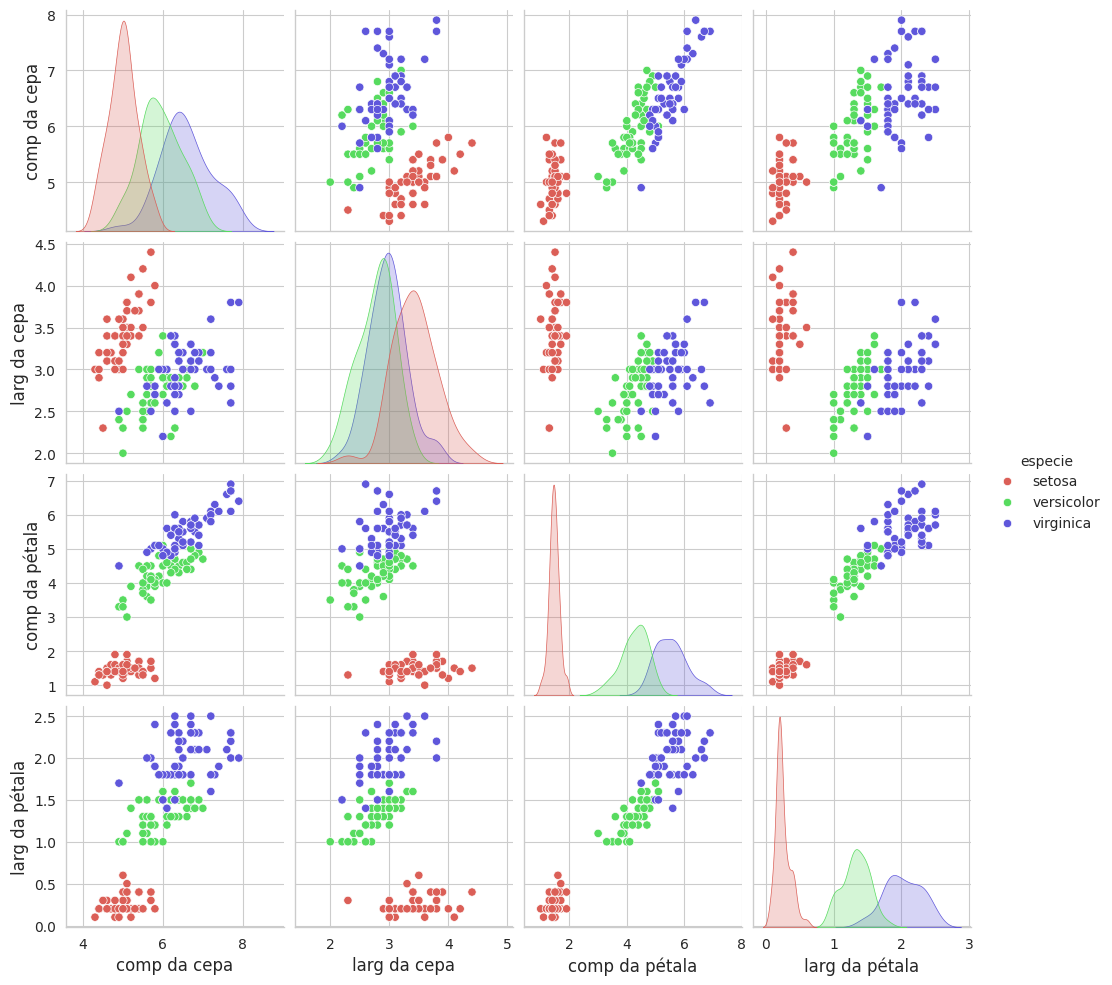

In [49]:
# Olhando a matriz de scatterplots
sns.pairplot(df, hue='especie', palette='hls')

In [50]:
# Usando DBSCan para detectar outliers
cols = df.columns[:-1]
X = df[cols[:4]].values
y = df['especie'].values

modelo = DBSCAN(eps=0.8, min_samples=19).fit(X)
print(modelo)

DBSCAN(eps=0.8, min_samples=19)


In [51]:
# Visualizando resultados
outliers_df = pd.DataFrame(X)
print(Counter(modelo.labels_))

Counter({1: 94, 0: 50, -1: 6})


In [52]:
# Visualizando as 6 observações
filtro = modelo.labels_ == -1
outliers_df[filtro]

,0,1,2,3
98,5.10,2.50,3.00,1.10
105,7.60,3.00,6.60,2.10
117,7.70,3.80,6.70,2.20
118,7.70,2.60,6.90,2.30
122,7.70,2.80,6.70,2.00
131,7.90,3.80,6.40,2.00


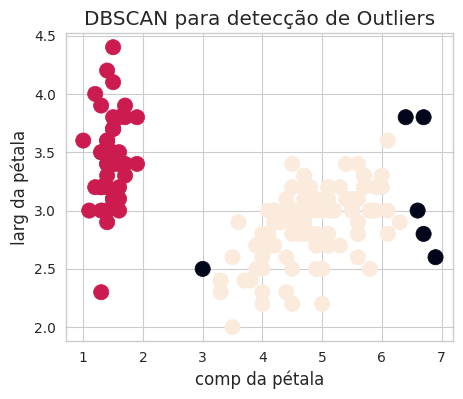

In [53]:
# Apresentando visualmente as observações
cores = modelo.labels_
plt.scatter(X[:, 2], X[:, 1], c=cores, s=120)
plt.xlabel('comp da pétala')
plt.ylabel('larg da pétala')
plt.title('DBSCAN para detecção de Outliers')
plt.show()

# Analise de Clusters

In [54]:
# Metodo KMeans
%matplotlib inline
rcParams['figure.figsize'] = 7, 4
plt.style.use('ggplot')

In [55]:
X = scale(iris.data)
y = pd.DataFrame(iris.target)
y.columns = ['targets']
variable_name = iris.feature_names
iris_df = pd.DataFrame(iris.data)
iris_df.columns = variable_name

In [56]:
# Construindo e rodando o modelo
clustering = KMeans(n_clusters=3, random_state=5)
clustering.fit(X)

KMeans(n_clusters=3, random_state=5)

Text(0.5, 1.0, 'Resultado KMeans')

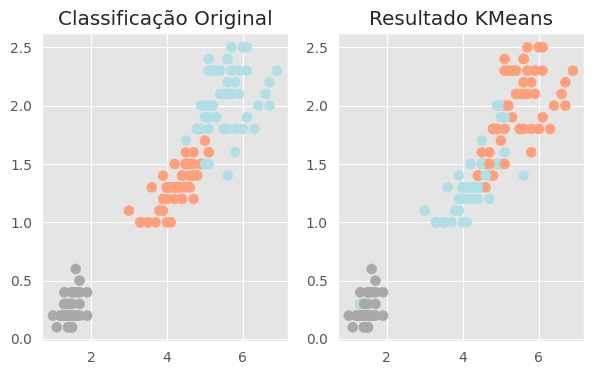

In [57]:
# Apresentando o resultado do modelo
cores = np.array(['darkgray', 'lightsalmon', 'powderblue'])

plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[clustering.labels_],
            s=50)
plt.title('Resultado KMeans')

Text(0.5, 1.0, 'Resultado KMeans')

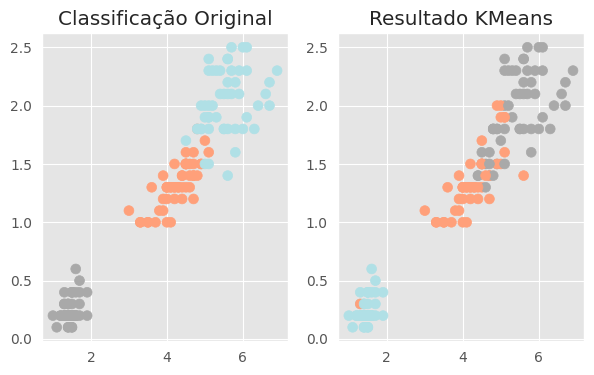

In [58]:
relabel = np.choose(clustering.labels_, [2, 0, 1]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[iris.target],
            s=50)
plt.title('Classificação Original')

plt.subplot(1, 2, 2)
plt.scatter(x=iris_df['petal length (cm)'],
            y=iris_df['petal width (cm)'],
            c=cores[relabel],
            s=50)
plt.title('Resultado KMeans')

In [59]:
# Avaliação da clusterização resultante
print(classification_report(y, relabel))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.80      0.74      0.77        50
           2       0.00      0.00      0.00        50

    accuracy                           0.25       150
   macro avg       0.27      0.25      0.26       150
weighted avg       0.27      0.25      0.26       150



# Conclusão Final:
***A análise exploratória revelou que o conjunto de dados Iris possui uma estrutura bem definida, com padrões claros entre as espécies. Técnicas como PCA ajudam a reduzir a dimensionalidade sem perder muita informação, enquanto métodos como K-Means e DBSCAN auxiliam na identificação de agrupamentos e outliers. O estudo demonstra a eficácia de abordagens estatísticas e de aprendizado de máquina para entender e segmentar dados biológicos.***